# Iris Flowers Classification ML Project 

## Task Details :
### Predict the species of the iris flower.

In [1]:
#Load Essentials 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

## Data loading

In [2]:
data = pd.read_csv('F:/letsgrow/iris.data',encoding="Latin1",sep=',',names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'],index_col=False)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [7]:
data["species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

## EDA

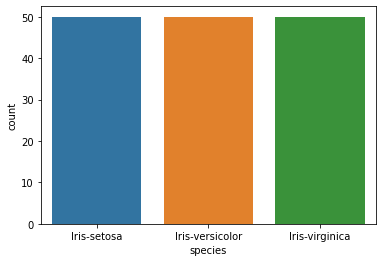

In [8]:
sns.countplot(data=data, x='species')

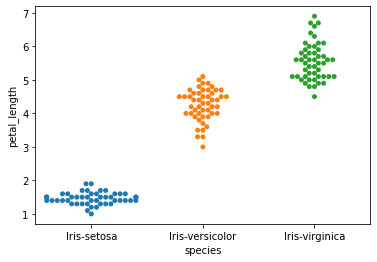

In [9]:
#Petal Length
sns.swarmplot(x=data.species, y=data.petal_length)

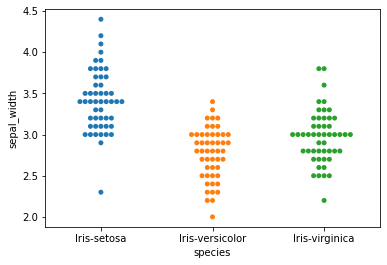

In [10]:
#sepal width
sns.swarmplot(x=data.species, y=data.sepal_width)

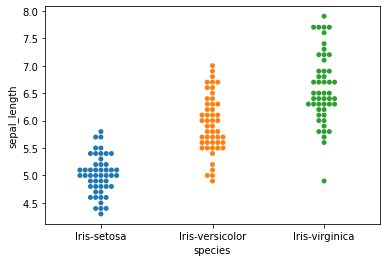

In [11]:
#sepal length
sns.swarmplot(x=data.species, y=data.sepal_length)

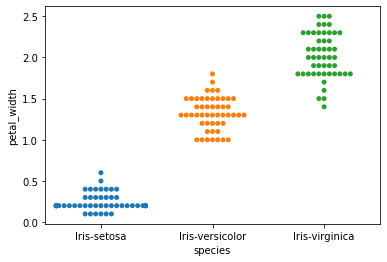

In [12]:
#petal width
sns.swarmplot(x=data.species, y=data.petal_width)

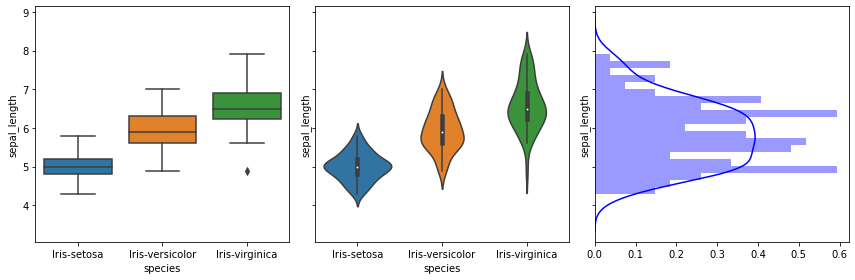

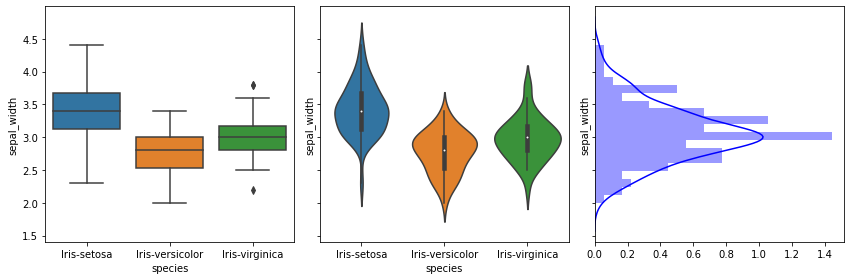

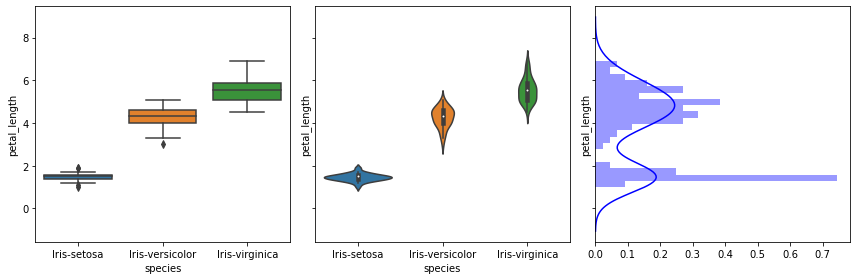

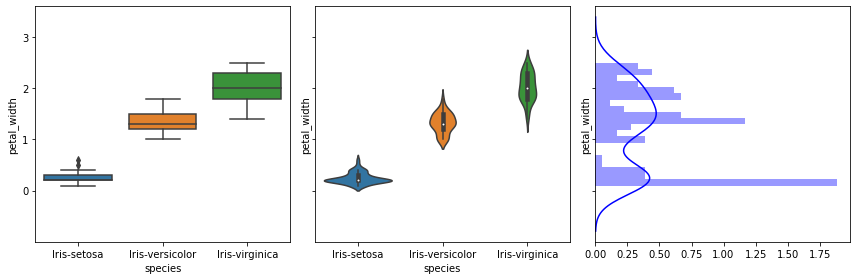

In [13]:
### Plotting feature distribution
for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    fig, ax = plt.subplots(nrows=1, ncols=3,
                        sharey=True,
                        figsize=(12,4))
  
    sns.boxplot(data=data, x='species', y=col, ax=ax[0])
    sns.violinplot(data=data, x='species',y=col, ax=ax[1])
    sns.distplot( data[col], ax=ax[2], color='blue',  vertical=True,bins=20)
    
    plt.tight_layout()
    plt.show()

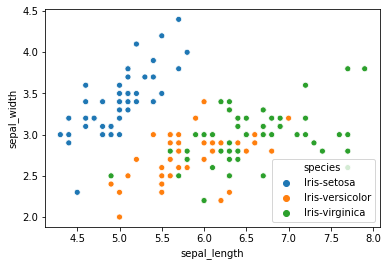

In [14]:
sns.scatterplot(x= "sepal_length",y = "sepal_width",hue = "species",data =data)

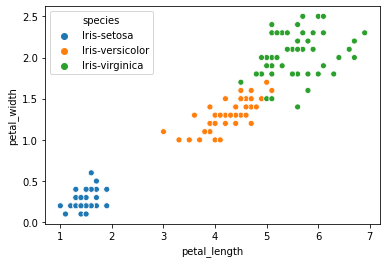

In [15]:
sns.scatterplot(x= "petal_length",y = "petal_width",hue = "species",data =data)

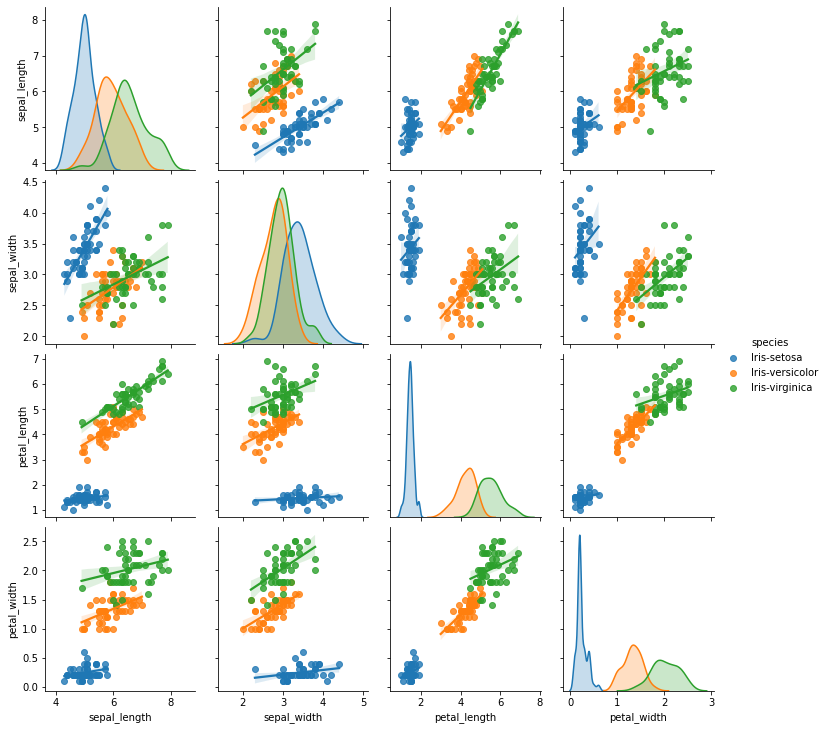

In [16]:
sns.pairplot(data, hue='species', kind='reg')

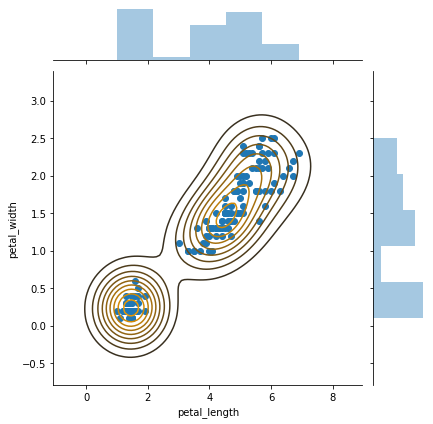

In [17]:
g=sns.jointplot(data=data,
                x='petal_length', y='petal_width',
                kind='scatter')

g.plot_joint(sns.kdeplot, color="orange")

## Data correlation

In [18]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


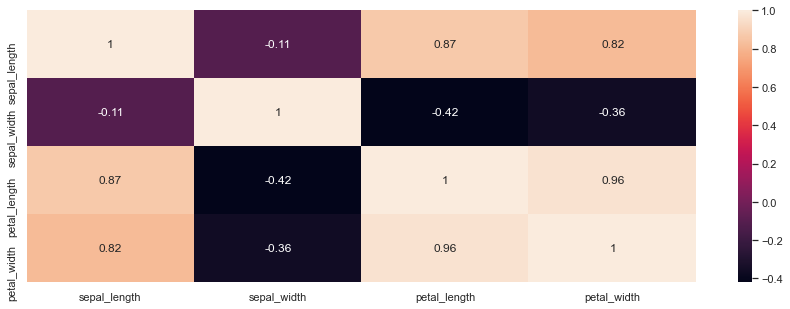

In [19]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)

## Train Test Split

In [20]:
X = data.drop('species', axis=1)
Y = data['species']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=445566,test_size =.3 )
print('Train Data:',X_train.shape,y_train.shape)
print('Test Data:',X_test.shape,y_test.shape)

Train Data: (105, 4) (105,)
Test Data: (45, 4) (45,)


## Modeling

#### SVM

In [22]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



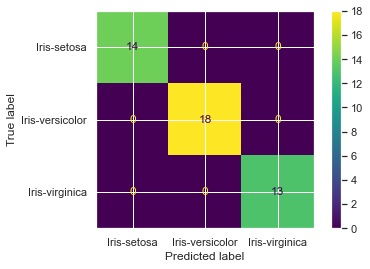

In [24]:
print(metrics.classification_report(y_pred, y_test))
metrics.plot_confusion_matrix(model, X_test, y_pred)

#### Decision Tree

In [25]:
### Using a single Decision Tree for this classification
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



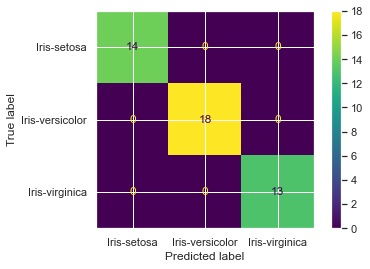

In [27]:
print(metrics.classification_report(y_pred, y_test))
metrics.plot_confusion_matrix(model, X_test, y_pred)

#### Random Forest

In [28]:
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



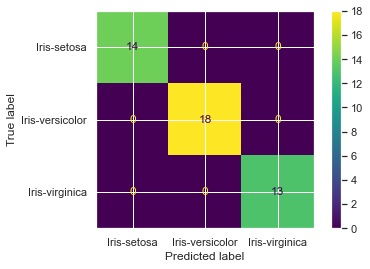

In [30]:
print(metrics.classification_report(y_pred, y_test))
metrics.plot_confusion_matrix(model, X_test, y_pred)